In [ ]:
#no

In [1]:
using Plots
using DifferentialEquations
using JuliaMBD
using JuliaMBD.Diagram

using DifferentialEquations
using Plots
using CSV
using DataFrames
using LookupTable
using .JuliaMBD
using .JuliaMBD.Diagram

In [22]:
###oneD

In [2]:
@model rear_damper begin
    df = CSV.read("damper_rate.csv", DataFrame)
    @parameter begin
        d_Rr_sus_fric_gain=10000
        d_Rr_sus_fric=30
    end
    @xmlmodel("METI_Vertical_Vibration.drawio", "rear_damper")
end

┌ Warning: The port Dict{Any, Any}("label" => "<p style=\"line-height: 100%;\"><br></p>", "name" => "in4", "id" => "WPKi3wvxXwLS31t63JW9-30", "parent" => "WPKi3wvxXwLS31t63JW9-25", "type" => "inport") has not been used.
└ @ JuliaMBD.Diagram /root/.julia/packages/JuliaMBD/JJKL5/src/diagrams/_xml2model.jl:76
┌ Warning: The port Dict{Any, Any}("label" => "<p style=\"line-height: 100%;\"><br></p>", "name" => "in3", "id" => "WPKi3wvxXwLS31t63JW9-29", "parent" => "WPKi3wvxXwLS31t63JW9-25", "type" => "inport") has not been used.
└ @ JuliaMBD.Diagram /root/.julia/packages/JuliaMBD/JJKL5/src/diagrams/_xml2model.jl:76


rear_damper (generic function with 1 method)

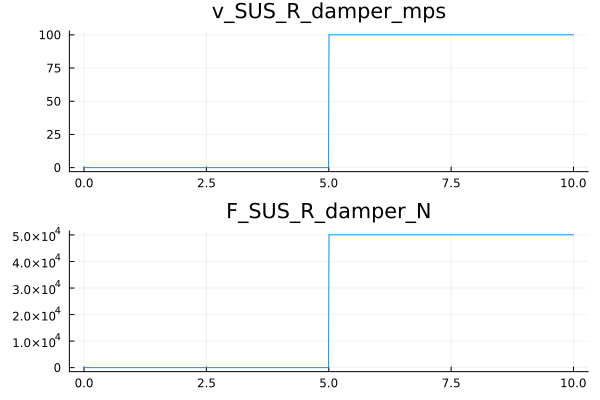

In [3]:
@model TestRear_damper begin
    @block begin
        m = rear_damper()
        s1 = Step(steptime=5, finalvalue=100)
    end
    @connect begin
        s1.out => m.v_SUS_R_damper_mps
    end
    @scope begin
        m.v_SUS_R_damper_mps => v_SUS_R_damper_mps
        m.F_SUS_R_damper_N => F_SUS_R_damper_N
    end
end

m = @compile TestRear_damper() 
res = simulate(m, tspan=[0, 10])
plot(res)

In [4]:
@buildxml "susR.xml" rear_damper

1610

In [ ]:
@model SUS_R_PNT begin
    @parameter begin
        L_ratio_Rr_sus = 1.2048
        z_k_Rr_sus_ini = 0.076651
        K_Rr_sus = 30690
    end
    @xmlmodel("METI_Vertical_Vibration.drawio", "SUS_R_PNT")
end

In [ ]:
@model TestSUS_R_PNT begin
    @block begin
        m = SUS_R_PNT()
        s1 = Step(steptime=5, finalvalue=100)
    end
    @connect begin
        s1.out => m.v_VL2SUS_R_mps
        s1.out => m.v_MUS_R2SUS_R_mps
    end
    @scope begin
        m.v_VL2SUS_R_mps => v_VL2SUS_R_mps
        m.v_MUS_R2SUS_R_mps => v_MUS_R2SUS_R_mps
        m.F_SUS_F2VL_N => F_SUS_F2VL_N
        m.F_SUS_R2MUS_R_N => F_SUS_R2MUS_R_N
    end
end

m = @compile TestSUS_R_PNT() 
res = simulate(m, tspan=[0, 10])
plot(res, layout=(2,2))